<a href="https://colab.research.google.com/github/anilcanatik/Capstone-Project/blob/master/yelp_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Yelp Review Dataset Sentiment Analysis:

### About:

## Library:

In [90]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import re
import matplotlib.pyplot as plt

## Loading Dataset:

I used sample data for google collab document, due to resource constraints. This sampled csv file contains 100k rows and 9 columns. [Download link](https://drive.google.com/u/0/uc?id=1urfoM-XS2l64yYASRHMj-lEuotPDBfyB&export=download)


In [150]:
df_load = pd.read_csv("https://drive.google.com/u/0/uc?id=1urfoM-XS2l64yYASRHMj-lEuotPDBfyB&export=download")

In [154]:
df_raw=df_load
df_raw1=df_raw

In [151]:
df_raw.shape

(100000, 10)

In [153]:
df_raw.head(3)

,user_id,text,date,review_id,business_id,funny,cool,useful,stars
0,'0tvCcnfJnSs55iB6mqPk3w',"""Normally I feel nothing special about Subway....",'2016-04-25 17:09:14','Q-9PnA7cO-jnNBRI-MnPGA','EFPPjBvuLU-mqtsLvYGD6Q',6,9,10,3
1,'zi17kHAU8Ejl5zIJe2E8vw','Mike T North Scottsdale \n\nDave just left af...,'2016-03-22 18:52:05','19ulV0sfMobpZZKDBgEFlw','g7OEfTHYGVnhT6Ld-2-4Eg',0,0,0,5
2,'MrYBVpqL0dzfK0FZNwiWqA',"""I last visited Mezzo Bistro 3 years ago. I to...",'2016-12-15 19:38:40','cqkmzlaEJWuEQJKxHjvAVg','h3pMMRwqBjMeMtk0_qQzRQ',0,0,0,4


#### Removing quotes from columns:

In [196]:
df_raw[["user_id","date","review_id","business_id"]]=df_raw1[["user_id","date","review_id","business_id"]].replace(to_replace=r'^.|.$', value='', regex=True)
df_raw.head(3)

,user_id,text,date,review_id,business_id,funny,cool,useful,stars
0,tvCcnfJnSs55iB6mqPk3,"""Normally I feel nothing special about Subway....",016-04-25 17:09:1,-9PnA7cO-jnNBRI-MnPG,FPPjBvuLU-mqtsLvYGD6,6,9,10,3
1,i17kHAU8Ejl5zIJe2E8v,'Mike T North Scottsdale \n\nDave just left af...,016-03-22 18:52:0,9ulV0sfMobpZZKDBgEFl,7OEfTHYGVnhT6Ld-2-4E,0,0,0,5
2,rYBVpqL0dzfK0FZNwiWq,"""I last visited Mezzo Bistro 3 years ago. I to...",016-12-15 19:38:4,qkmzlaEJWuEQJKxHjvAV,3pMMRwqBjMeMtk0_qQzR,0,0,0,4


## Exploratory Data Analysis:


Position of EDA should be after pre-processing.

#### Stars Distribution:


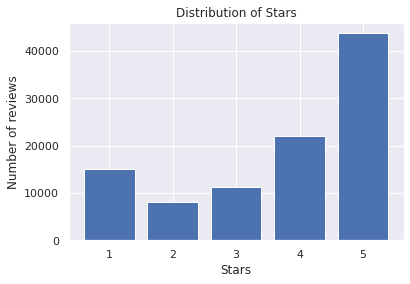

In [96]:
# The Stars distribution 
values, counts = np.unique(df_raw['stars'], return_counts=True)

plt.figure()
plt.bar(values, counts, tick_label=['1','2','3','4','5'])
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Number of reviews')
plt.show()

In [97]:
print(df_raw.stars.value_counts())

5    43780
4    21980
1    14992
3    11220
2     8028
Name: stars, dtype: int64


#### Number of Unique Buisnesses Reviewed:

**46706** Unique Businesses are reviewed, and most of the reviewed business contain **128** reviews.  (Total number of reviews is **100.000**)

In [98]:
business = df_raw.business_id
business.value_counts()

4JNXUYY8wbaaDmk3BPzlWw    128
RESDUcs7fIiihp38-d6_6g    122
K7lWdNUhCbcnEvI0NhGewg    101
f4x1YBxkLrZg652xt2KR5g     93
DkYS3arLOhA8si5uUEmHOw     81
                         ... 
xl-BIKCRGpOGXJRaM0jh2w      1
7AmXzL434IH6V5-Ljk_8Mg      1
7i0kkZ79MMkI59qCGilltQ      1
7GV8LoRVQ4W02ODHr8Ct0w      1
uZ2zuwOUwJ63ETKlHkdijQ      1
Name: business_id, Length: 46706, dtype: int64

#### Number of Unique Users:

**82135** Unique Users posted reviews, and user with most reviews posted **55** reviews.  (Total number of reviews is **100.000**)

In [99]:
user = df_raw.user_id
user.value_counts()

CxDOIDnH8gp9KXzpBHJYXw    55
QJI9OSEn6ujRCtrX06vs1w    33
bLbSNkLggFnqwNNzzq-Ijw    29
PKEzKWv_FktMm2mGPjwd0Q    28
ELcQDlf69kb-ihJfxZyL0A    26
                          ..
SJpMpOzO2hiia0Tu1h0ptw     1
PnIUcLW1RhmWcL18B3t-sg     1
cQLpUesYCAaUy_HjljkAHw     1
R2QQkKhREpT9U9Lf0Kliqg     1
cJL56v0rX7KxuyFmgT4Fng     1
Name: user_id, Length: 82135, dtype: int64

#### Labeling Positive and Negative Reviews:

In this part, we classify our reviews rating into two classes of 0 (Negative for rating less than and equal to 3) and 1
(Positive for rating more than 3)  by creating new column as the "Target" for further processing.

In [100]:
from wordcloud import WordCloud
# Create new column "Target" that stored 0's or 1's. 0 being Negative, 1 being Positive
df_raw["Target"] = np.where(df_raw["stars"] > 3, 1, 0)
pos = df_raw[df_raw['Target']==1]['text']
neg = df_raw[df_raw['Target']==0]['text']
df_raw.tail(3)

,user_id,text,date,review_id,business_id,funny,cool,useful,stars,Target
99997,nX6-QUKGqtnfo53-nmckLQ,This place was awful!!! I got a certificate to...,2015-09-10 23:48:51,fXJM8U6sK8prrq4q2UXQJg,BUmLZdMP-Ps7KokyFh8DsA,0,0,0,1,0
99998,7BnG6iaLz4T_tZadH5LSTQ,Burgers here taste great and made to order. I...,2017-02-08 22:11:17,rRWIu2ntH4Wa49I10gZseA,b07QUKi2J1LGIiDCZkyCDw,0,0,1,5,1
99999,4ZBeitH4mXmNpporOnVVpg,Was looking for something to eat late night an...,2018-05-30 16:56:26,-pdtrdors24RFOnvOyb-hg,ysv6yhVYOoH9Pf7PlMyD0g,1,0,1,3,0


#### Word Cloud:

##### Positive Reviews:

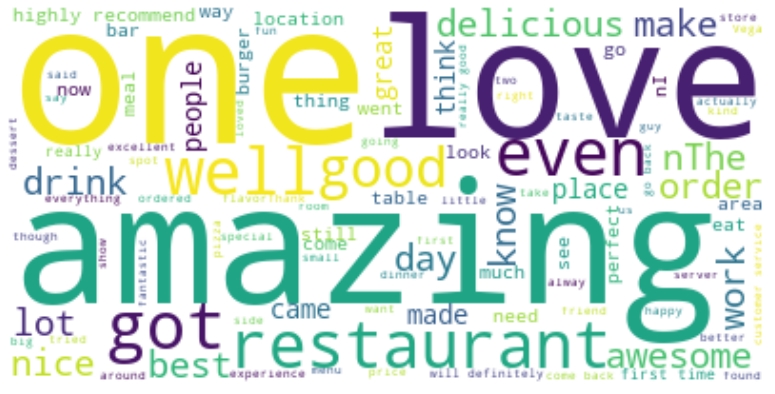

In [101]:
text_pos = " ".join(i for i in pos)
# Create a word cloud image
wc_pos = WordCloud(background_color="white", max_words=100, contour_width=10, contour_color='firebrick')
wc_pos.generate(text_pos)
plt.figure(figsize=(14,7))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Negative Reviews:

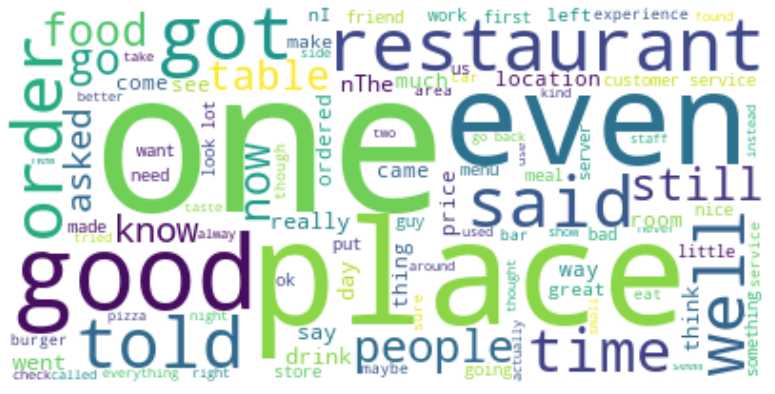

In [102]:
text_neg = " ".join(i for i in neg)
# Create a word cloud image
wc_neg = WordCloud(background_color="white", max_words=100, contour_width=10, contour_color='firebrick')
wc_neg.generate(text_neg)
plt.figure(figsize=(14,7))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

## Preprocessing: 

### Library:

In [103]:
from bs4 import BeautifulSoup
import spacy
import gensim.downloader as api

### Cleaning:

Part of the cleaning functions are taken from [this link](https://medium.com/@sabber/classifying-yelp-review-comments-using-lstm-and-word-embeddings-part-1-eb2275e4066b) and [this link](https://gist.github.com/jiahao87/d57a2535c2ed7315390920ea9296d79f).

#### Removing HTML tags: 

In [104]:
def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

#### Removing Punctuation:

In [140]:
import string

In [142]:
def remove_punc(text):
  """ Remove puncuation """
  text = re.sub(r'[^\w\s]','',text)
  return text

#### Removing Extra Whitespace:


In [105]:
def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())

#### All Lowercase:

In [106]:
def lowercase(text):
    """lowercase"""
    text = text.lower()
    return text

#### Converting Accented Characters:

In [134]:
!pip install unidecode
import unidecode

In [138]:
def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text

#### Expanding Contractions:

In [136]:
!pip install contractions
import contractions

In [133]:
def expand_cont(text):
  clean_text=contractions.fix(text)
  return clean_text
#Demo:
expand_cont("you're happy now aren't you")

'you are happy now are not you'

#### Applying Cleaning Functions:

In [143]:
def clean(text):
  #html removal:
  text = strip_html_tags(text)
  #removing extra Whitespace:
  text= remove_whitespace(text)
  #all lowercase:
  text = lowercase(text)
  #Converting Accented Charachters:
  text = remove_accented_chars(text)
  #Expanding Contractions:
  text = expand_cont(text)
  #Removing punctuation:
  text= remove_punc(text)
  return text
#Demo:
clean("<title>I am</title>    DEMOnstration café aren't I am! éffé!.")


'i am demonstration cafe are not i am effe'

In [198]:
df_pre = df_raw[["text","stars"]]
df_pre['text'] = df_pre['text'].apply(lambda x: clean(x))
df_pre.tail(3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,stars
99997,this place was awful i got a certificate to ge...,1
99998,burgers here taste great and made to order i l...,5
99999,was looking for something to eat late night an...,3


#### Labeling Positive and Negative Reviews:

In [200]:
df_pre["target"] = np.where(df_pre["stars"] > 3, 1, 0)
df_pre.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,stars,target
0,normally i feel nothing special about subway h...,3,0
1,mike t north scottsdale nndave just left after...,5,1


In [171]:
target = df_pre['stars'].map(lambda x : 1 if int(x) > 3 else 0)

###  Tokenization:

#### Library:

In [161]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential

#### Tokenizing and Creating Sequence:

In [232]:
### Create sequence
vocabulary_size = 50000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(df_pre['text'])


sequences = tokenizer.texts_to_sequences(df_pre['text'])
data = pad_sequences(sequences, maxlen=50)


target1 = df_pre['target'].tolist()

### Vectorization:

#### Library:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Using uni and bigrams, for the bigrams minimum occurance of bigram should be 10.

#### Applying Vectorization

In [ ]:
texts = df_pre['text'].tolist()
target1 = df_pre['target'].tolist()
print(len(texts))

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=10)
vectors = vectorizer.fit_transform(texts)
print(vectors.shape)

## Model Building:

###LSTM:

#### Library:

In [233]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split

#### Train Test Spliting:

In [235]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(data, target1, test_size=0.2, random_state=1337)
print(X_train0.shape, X_test0.shape)

(80000, 50) (20000, 50)


#### Building Model:

In [236]:
model = Sequential()
model.add(Embedding(50000, 100, input_length=50))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Model fit:

In [237]:
model.fit(data, np.array(target1), validation_split=0.4, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 263s 140ms/step - loss: 0.3573 - accuracy: 0.8429 - val_loss: 0.3122 - val_accuracy: 0.8655
Epoch 2/3
1875/1875 [==============================] - 263s 140ms/step - loss: 0.2503 - accuracy: 0.8953 - val_loss: 0.3147 - val_accuracy: 0.8666
Epoch 3/3
1875/1875 [==============================] - 259s 138ms/step - loss: 0.1894 - accuracy: 0.9249 - val_loss: 0.3492 - val_accuracy: 0.8632


#### Model Evaluation:

In [241]:
y_pred0 = model.predict(X_test0)
y_pred0 =(y_pred0>0.5)

# Accuracy
b = accuracy_score(y_test0, y_pred0)
print("Accuracy: {}".format(b))
# Recall
from sklearn.metrics import recall_score
c= recall_score(y_test0, y_pred0, average=None)
print("Recall: {}".format(c))
# Precision
from sklearn.metrics import precision_score
d= precision_score(y_test0, y_pred0, average=None)
print("Precision: {}".format(d))
# F1 Score
from sklearn.metrics import f1_score
e =f1_score(y_test0, y_pred0)
print("F1-Score: {}".format(e))

Accuracy: 0.91785
Recall: [0.84062454 0.95753539]
Precision: [0.91049777 0.92120594]
F1-Score: 0.9390194113498869


### Glove:

#### Library:

Glove Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors, 1.42 GB download)

In [177]:
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip

--2020-08-07 15:23:42--  http://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.twitter.27B.zip [following]
--2020-08-07 15:23:42--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2020-08-07 15:23:43--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [appli

In [178]:
!unzip glove.twitter.27B.zip

Archive:  glove.twitter.27B.zip
  inflating: glove.twitter.27B.25d.txt  
  inflating: glove.twitter.27B.50d.txt  
  inflating: glove.twitter.27B.100d.txt  
  inflating: glove.twitter.27B.200d.txt  


In [179]:
!ls

glove.twitter.27B.100d.txt  glove.twitter.27B.25d.txt  glove.twitter.27B.zip
glove.twitter.27B.200d.txt  glove.twitter.27B.50d.txt  sample_data


#### Train Test Splitting:

In [243]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data, target1, test_size=0.2, random_state=1337)
print(X_train1.shape, X_test1.shape)

(80000, 50) (20000, 50)


#### Building Model:

Using glove.twitter.27B.100d

In [180]:
# Creating a dictionary that will hold the mappings between words:
embeddings_dict = {}
with open("glove.twitter.27B.100d.txt", 'r', encoding="utf-8") as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict[word] = vector
print('Loaded %s word vectors.' % len(embeddings_dict))

#### Creating Embedding Matrix:

In [183]:
# Creating a weight matrix for words in training docs
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [184]:
model_glove = Sequential()
model_glove.add(Embedding(vocabulary_size, 100, input_length=50, weights=[embedding_matrix], trainable=False))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(LSTM(100))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Model Fit:

In [246]:
model_glove.fit(X_train1, np.array(y_train1), validation_split=0.4, epochs = 3)

Epoch 1/3
1500/1500 [==============================] - 34s 23ms/step - loss: 0.3269 - accuracy: 0.8549 - val_loss: 0.3020 - val_accuracy: 0.8693
Epoch 2/3
1500/1500 [==============================] - 34s 23ms/step - loss: 0.3093 - accuracy: 0.8636 - val_loss: 0.3071 - val_accuracy: 0.8644
Epoch 3/3
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2932 - accuracy: 0.8709 - val_loss: 0.3057 - val_accuracy: 0.8678


#### Model Evaluation:

In [247]:
y_pred1 = model_glove.predict(X_test1)
y_pred1 =(y_pred1>0.5)

# Accuracy
b = accuracy_score(y_test1, y_pred1)
print("Accuracy: {}".format(b))
# Recall
from sklearn.metrics import recall_score
c= recall_score(y_test1, y_pred1, average=None)
print("Recall: {}".format(c))
# Precision
from sklearn.metrics import precision_score
d= precision_score(y_test1, y_pred1, average=None)
print("Precision: {}".format(d))
# F1 Score
from sklearn.metrics import f1_score
e =f1_score(y_test1, y_pred1)
print("F1-Score: {}".format(e))

Accuracy: 0.8632
Recall: [0.73869495 0.92718189]
Precision: [0.83904969 0.87349355]
F1-Score: 0.8995373430270984


### SVM:

#### Library:

In [256]:
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix


#### Test Train Splitting:

In [205]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(vectors, target1, test_size=0.2, random_state=1337)
print(X_train2.shape, X_test2.shape)

(80000, 176989) (20000, 176989)


#### Model Building:

In [206]:
%%time
svm = LinearSVC()
svm.fit(X_train2, y_train2)

CPU times: user 1.63 s, sys: 19.6 ms, total: 1.65 s
Wall time: 1.65 s


In [207]:
predictions = svm.predict(X_test2)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test2, predictions))

0.89425


#### Model Evaluation:

In [218]:
# Accuracy
from sklearn.metrics import accuracy_score
b = accuracy_score(y_test2, predictions)
print("Accuracy: {}".format(b))
# Recall
from sklearn.metrics import recall_score
c= recall_score(y_test2, predictions, average=None)
print("Recall: {}".format(c))
# Precision
from sklearn.metrics import precision_score
d= precision_score(y_test2, predictions, average=None)
print("Precision: {}".format(d))
# F1 Score
from sklearn.metrics import f1_score
e =f1_score(y_test2, predictions)
print("F1-Score: {}".format(e))

Accuracy: 0.89425
Recall: [0.8222124 0.9312694]
Precision: [0.86009245 0.91065877]
F1-Score: 0.9208487706298417


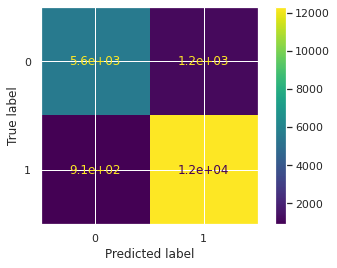

In [228]:
# Confusion Matrix:
plot_confusion_matrix(svm, X_test2, y_test2)
plt.show()

### Logistic Regression:

#### Library:

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV

#### Train Test Splitting:

In [259]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(vectors, target1, test_size=0.2, random_state=1337)
print(X_train3.shape, X_test3.shape)

(80000, 121469) (20000, 121469)


#### Model Building:

In [271]:
#Grid Search 
#grid={"C":[0.001,0.01,0.1,1,10,100], "penalty":["l2"]}

logreg = LogisticRegression(max_iter=1000)
#logreg_cv=RandomizedSearchCV(logreg,grid)
#logreg_cv.fit(X_train3,y_train3)
#tuned hpyerparameters :(best parameters)  {'penalty': 'l2', 'C': 10}
#accuracy : 0.9077249999999999
logreg.fit(X_train3,y_train3)

#print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
#print("accuracy :",logreg_cv.best_score_)

y_pred3=logreg.predict(X_test3)

tuned hpyerparameters :(best parameters)  {'penalty': 'l2', 'C': 10}
accuracy : 0.9077249999999999


#### Model Evaluation:

In [272]:
# Accuracy
from sklearn.metrics import accuracy_score
b = accuracy_score(y_test3, y_pred3)
print("Accuracy: {}".format(b))
# Recall
from sklearn.metrics import recall_score
c= recall_score(y_test3, y_pred3, average=None)
print("Recall: {}".format(c))
# Precision
from sklearn.metrics import precision_score
d= precision_score(y_test3, y_pred3, average=None)
print("Precision: {}".format(d))
# F1 Score
from sklearn.metrics import f1_score
e =f1_score(y_test3, y_pred3)
print("F1-Score: {}".format(e))

Accuracy: 0.90355
Recall: [0.82073943 0.94610552]
Precision: [0.88669637 0.91127151]
F1-Score: 0.9283618672707692


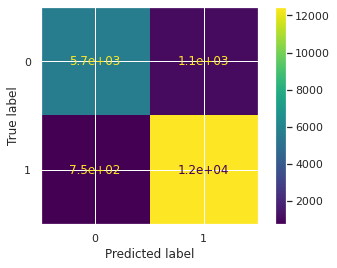

In [255]:
# Confusion Matrix:
plot_confusion_matrix(logreg, X_test3, y_test3)
plt.show()